In [ ]:
from keras.datasets import mnist
import numpy as np
import pandas as pd


In [ ]:
# Base class
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

In [ ]:
class FCLayer(Layer):
    def __init__(self, input_size, output_size):
      self.weights = np.random.rand(input_size, output_size) - 0.5
      self.bias = np.random.rand(1, output_size) - 0.5
    
    def forward_propagation(self,input_data):
      self.input = input_data
      self.output = np.dot(self.input,self.weights)+self.bias
      return(self.output)

    ## compute dE/dw, de/dB for a given outputt erroor. Returns input error to be given t the next layer
    def backward_propagation(self,output_error, learning_rate):
      input_error = np.dot(output_error, self.weights.T)
      weights_error = np.dot(self.input.T, output_error)

      self.weights -= learning_rate * weights_error
      self.bias -= learning_rate * output_error
      return(input_error)

In [ ]:

class ActivationLayer(Layer):
    def __init__(self):
      self.activation = lambda x: np.tanh(x)
      self.activation_prime = lambda x: 1-np.tanh(x)**2;
    
    def forward_propagation(self, input_data):
      self.input = input_data
      self.output = self.activation(self.input)
      return(self.output)
    
    def backward_propagation(self, output_error, learning_rate):
      return(self.activation_prime(self.input) * output_error)

In [ ]:
# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

In [ ]:
class Network:
  def __init__(self):
    self.layers=[]
    self.loss=None
    self.loss_prime=None

  def add(self,layer):
    self.layers.append(layer)

  def use(self,loss,loss_prime):
    self.loss = loss
    self.loss_prime = loss_prime

  def predict(self,input_data):
    result=[]
    for i in range(len(input_data)):
      output=input_data[i]
      for layer in self.layers:
        output= layer.forward_propagation(output)
      result.append(output)
    return(result)

  def fit(self, x_train, y_train, epochs, learning_rate):
    samples = len(x_train)
    errors=[]

    for i in range(epochs):
      err = 0
      for j in range(samples):
        output = x_train[j]
        for layer in self.layers:
          output = layer.forward_propagation(output)
        
        err += self.loss(y_train[j], output)

        error = self.loss_prime(y_train[j], output)
        for layer in reversed(self.layers):
          error = layer.backward_propagation(error, learning_rate)
      errors.append(err/samples)

      print('epoch %d/%d   error=%f' % (i+1, epochs, err))
    return(errors)



In [ ]:
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])


In [ ]:
net = Network()
net.add(FCLayer(2,5))
net.add(ActivationLayer())
net.add(FCLayer(5,1))
net.add(ActivationLayer())
net.use(mse, mse_prime)

In [ ]:
err = net.fit(x_train, y_train, epochs=1000, learning_rate=0.1)

epoch 1/1000   error=3.439531
epoch 2/1000   error=1.469290
epoch 3/1000   error=1.249098
epoch 4/1000   error=1.221891
epoch 5/1000   error=1.213275
epoch 6/1000   error=1.208269
epoch 7/1000   error=1.204283
epoch 8/1000   error=1.200643
epoch 9/1000   error=1.197125
epoch 10/1000   error=1.193641
epoch 11/1000   error=1.190152
epoch 12/1000   error=1.186639
epoch 13/1000   error=1.183090
epoch 14/1000   error=1.179496
epoch 15/1000   error=1.175854
epoch 16/1000   error=1.172157
epoch 17/1000   error=1.168403
epoch 18/1000   error=1.164588
epoch 19/1000   error=1.160709
epoch 20/1000   error=1.156765
epoch 21/1000   error=1.152753
epoch 22/1000   error=1.148673
epoch 23/1000   error=1.144523
epoch 24/1000   error=1.140304
epoch 25/1000   error=1.136016
epoch 26/1000   error=1.131659
epoch 27/1000   error=1.127236
epoch 28/1000   error=1.122749
epoch 29/1000   error=1.118200
epoch 30/1000   error=1.113594
epoch 31/1000   error=1.108935
epoch 32/1000   error=1.104229
epoch 33/1000   e

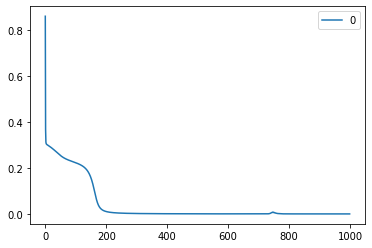

In [ ]:
pd.DataFrame(err).plot()

In [ ]:
out = net.predict(x_train)
print(x_train, out)

[[[0 0]]

 [[0 1]]

 [[1 0]]

 [[1 1]]] [array([[0.00043794]]), array([[0.97852756]]), array([[0.97771572]]), array([[-0.00452103]])]


In [ ]:
###### Digits recognitin
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 1, 28*28).astype('float32')/255
y_train = np_utils.to_categorical(y_train)

x_test = x_test.reshape(x_test.shape[0], 1, 28*28).astype('float32')/255
y_test = np_utils.to_categorical(y_test)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
net = Network()
net.add(FCLayer(28*28, 100))
net.add(ActivationLayer())
net.add(FCLayer(100, 50)) 
net.add(ActivationLayer())
net.add(FCLayer(50, 10)) 
net.add(ActivationLayer())
net.use(mse, mse_prime)

errors = net.fit(x_train[0:5000], y_train[0:5000], epochs=35, learning_rate=0.1)

epoch 1/35   error=597.229832
epoch 2/35   error=294.311087
epoch 3/35   error=222.290965
epoch 4/35   error=182.827325
epoch 5/35   error=156.561311
epoch 6/35   error=137.362874
epoch 7/35   error=122.995554
epoch 8/35   error=111.681362
epoch 9/35   error=102.327054
epoch 10/35   error=94.795020
epoch 11/35   error=88.419284
epoch 12/35   error=82.838767
epoch 13/35   error=78.053786
epoch 14/35   error=73.588500
epoch 15/35   error=69.571904
epoch 16/35   error=66.085256
epoch 17/35   error=62.907259
epoch 18/35   error=59.947271
epoch 19/35   error=57.193714
epoch 20/35   error=54.729624
epoch 21/35   error=52.550492
epoch 22/35   error=50.488494
epoch 23/35   error=48.678247
epoch 24/35   error=47.048339
epoch 25/35   error=45.462000
epoch 26/35   error=43.884629
epoch 27/35   error=42.421490
epoch 28/35   error=41.161154
epoch 29/35   error=39.919483
epoch 30/35   error=38.800290
epoch 31/35   error=37.824970
epoch 32/35   error=36.865852
epoch 33/35   error=35.948138
epoch 34/3

In [ ]:
errors=[]
for i in range(1000):
  out=sum((net.predict(x_test[i]) - y_test[i])[0][0])
  errors.append(0 if out<0.5 else 1)


In [ ]:
np.mean(errors)

0.028

Extend Digits network to hhandwritten characters 

Use NIST dataset: EMNIST Letters: 145,600 characters. 26 balanced classes.
https://www.nist.gov/itl/products-and-services/emnist-dataset

* Play with NN configurations -- number of layers, ssize of layers
* Please try to break it
* Throw in some random noise 
* Replace tangent with another function (logit/ sigmioid???)
